In [1]:
#import needed libraries (although not all imported below are used in the given code)

import os
from os import listdir
from os.path import isfile, join

import sys
import codecs
import fileinput
import string
from collections import OrderedDict

import numpy as np

from pandas import DataFrame
import pandas as pd

import matplotlib

%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates as md
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

#from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import optimize, stats
from scipy.integrate import quad
from scipy.signal import find_peaks, peak_widths,hilbert

from decimal import Decimal



import iminuit 


import csv
import cmath
import math
from math import sqrt




# destination to the data (input) and output folders (change according to the path on your PC)

containing_folder_path = "/home/mfedkevych/Work/LZ/"
path_base = containing_folder_path
measurement_path= path_base
measurement_output_path= path_base






#function to count number of significant digits after comma
def number_sigdigs(x):
    digs_after_comma = str(x - math.floor(x))
    digs_after_comma = digs_after_comma[2:]
    number=0
    for c in digs_after_comma:
        if c=='0':
            number+=1
        else:
            number+=2
            break
    return number

print('numpy version', np.__version__)
print('matplotlib version', matplotlib.__version__)
print('pandas version', pd.__version__)
print('scipy version', scipy.__version__)
print('iminuit version', iminuit.__version__)

numpy version 1.23.3
matplotlib version 3.6.0
pandas version 1.5.0
scipy version 1.9.1
iminuit version 2.17.0


In [2]:
# read the data files and put the content into list of dataframes

numbers=np.linspace(0,8191,num=8192)
numbers=list(numbers)

import re

files_scan=[] #list of scan files
files_in_folder = [f for f in listdir (measurement_path) if isfile(join(measurement_path, f))]
files_in_folder.sort()
for f in files_in_folder:
    if "4.4_MeV_gamma-to-neutron" in f: #choose only files with names containing "scan"
        
        print(f) #prints scan file name
        files_scan.append(f) #choose only files with names containing "scan"
        


        scan = pd.read_csv(measurement_path + f, #read file content in DataFrame format
            skiprows=None, # skip the points (rows) where the magnetic field did not stabilize yet
            header=None,
            delimiter="\t",
            #skip_blank_lines=True,
            )
        #scan_temp.insert(1, 1, numbers, True)
        print(scan) #prints scan file data in DataFrame format
        



4.4_MeV_gamma-to-neutron.dat
          0         1
0  0.557799  0.027016
1  0.531711  0.023991
2  0.576813  0.028669
3  0.523121  0.023029


In [3]:
#checking that the scan files have been read and written in the right order

i=0
while i<len(files_scan):
    print(i, files_scan[i])
    i+=1


0 4.4_MeV_gamma-to-neutron.dat


In [4]:
captions=[" ","AmBe-1", "AmBe-2", "AmBe-3", "AmBe-4", "Mowlavi, Koohi-Fayegh, 2004", "Croft, 1989"]
source_numbers=[1,2,3,4,5,6]

<Figure size 1700x1400 with 0 Axes>

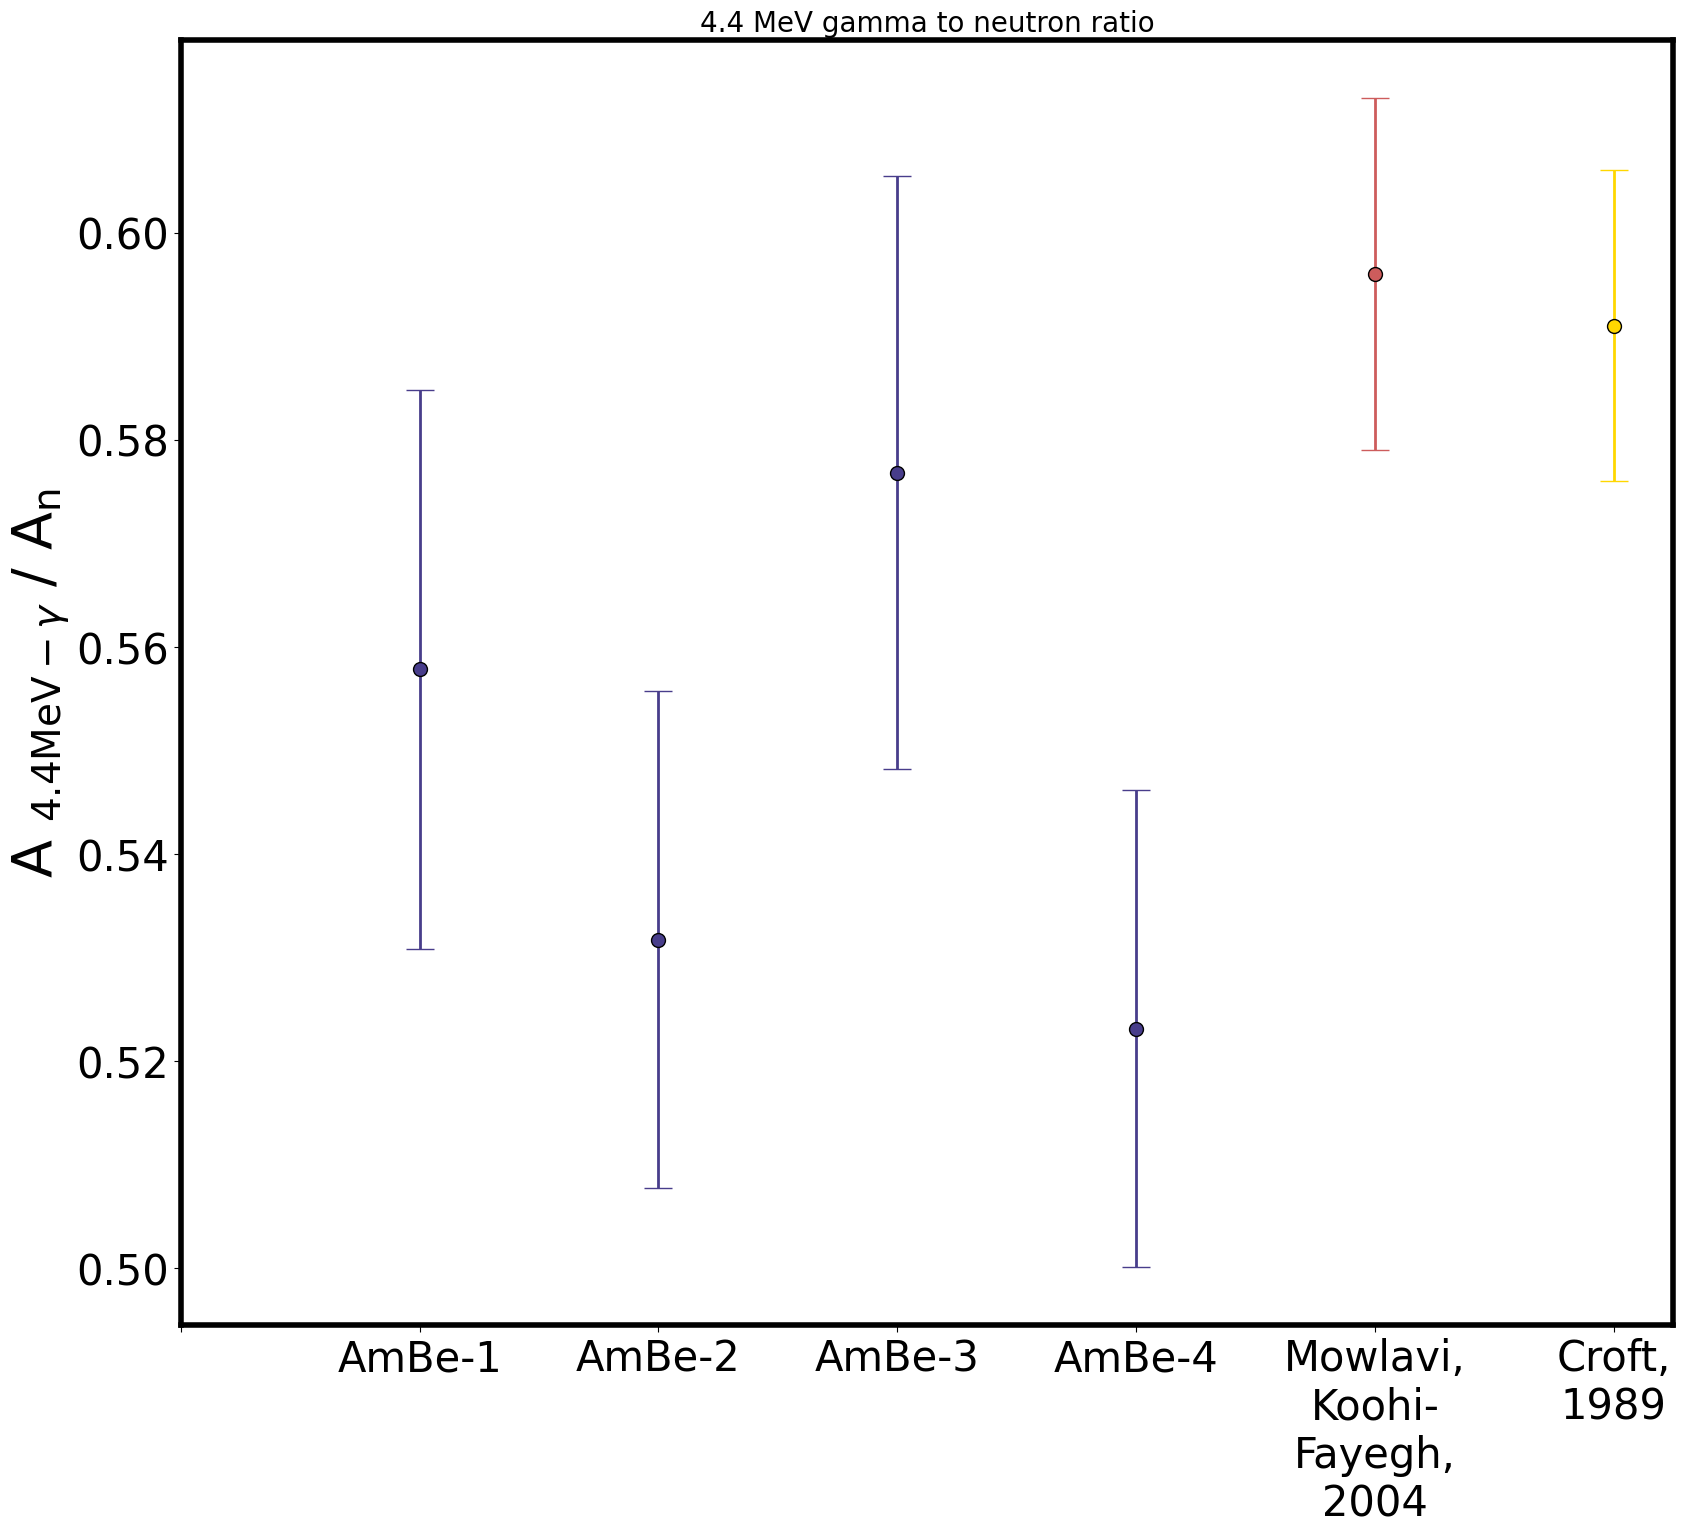

In [5]:
#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (17.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65


#define fit function for average pulse
from scipy.integrate import quad
from decimal import Decimal

from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D





plt.figure()
fig, ax1 = plt.subplots()

plt.title('4.4 MeV gamma to neutron ratio', fontsize=20)


#ax1.set_xticklabels(captions)




#ax1.set_xlabel( "Source", fontsize=40)
ax1.set_ylabel( "A $_{4.4\mathrm{MeV}-\gamma}$ / A$_\mathrm{n}$", fontsize=40)


#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)


for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(30)

ax1.tick_params(length=5)

fig.tight_layout()





data_err = plt.errorbar(source_numbers[0:4], scan[0], yerr=np.asarray(scan[1]), fmt='o', mec='black', 
                            mew=1, color = 'darkslateblue', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(source_numbers[0:4], scan[0], label=r'Data', edgecolors='black', 
                              marker="o", color="darkslateblue", s=100, **analysis_kwargs)


data_err = plt.errorbar(source_numbers[4], 0.596, yerr=0.017, fmt='o', mec='black', 
                            mew=1, color = 'indianred', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(source_numbers[4], 0.596, label=r'Literature 1', edgecolors='black', 
                              marker="o", color="indianred", s=100, **analysis_kwargs)


data_err = plt.errorbar(source_numbers[5], 0.591, yerr=0.015, fmt='o', mec='black', 
                            mew=1, color = 'gold', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(source_numbers[5], 0.591, label=r'Literature 2', edgecolors='black', 
                              marker="o", color="gold", s=100, **analysis_kwargs)



import textwrap

plt.xticks(range(7), [textwrap.fill(label, 8) for label in captions], 
           rotation = 0, fontsize=30, horizontalalignment="center")






#save and show the plot
plt.savefig(measurement_output_path+"4.4MeV_gamma-to-neutron.png", bbox_inches ='tight')
plt.show()

